In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# import the breast cancer dataset
diagnoses = pd.read_csv('datasets/breast_cancer.csv')

# select columns for training and testing
X = diagnoses[diagnoses.columns[2:]]
y = diagnoses['diagnosis']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [23]:
from sklearn.linear_model import LogisticRegression

# classify the data using logistic regression
logistic_regression = LogisticRegression(max_iter=10000, random_state=0).fit(X_train, y_train)
print('Train accuracy:', logistic_regression.score(X_train, y_train))
print('Test accuracy:', logistic_regression.score(X_test, y_test))

Train accuracy: 0.960093896713615
Test accuracy: 0.951048951048951


In [24]:
from sklearn.decomposition import PCA

# reduce dimensions with PCA
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# train a new classifier for the PCA-reduced data
logistic_regression = LogisticRegression(random_state=0).fit(X_train_pca, y_train)
print('Train accuracy:', logistic_regression.score(X_train_pca, y_train))
print('Test accuracy:', logistic_regression.score(X_test_pca, y_test))

Train accuracy: 0.9248826291079812
Test accuracy: 0.9440559440559441


In [25]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.svm import SVC

# reduce dimensions with LLE
lle = LocallyLinearEmbedding(n_components=2).fit(X_train)
X_train_lle = lle.transform(X_train)
X_test_lle = lle.transform(X_test)

# train a new classifier for the LLE-reduced data
logistic_regression = LogisticRegression(random_state=0).fit(X_train_lle, y_train)
print('Train accuracy:', logistic_regression.score(X_train_lle, y_train))
print('Test accuracy:', logistic_regression.score(X_test_lle, y_test))

# train a new classifier for the LLE-reduced data
svm_classifier = SVC().fit(X_train_lle, y_train)
print('Train accuracy:', svm_classifier.score(X_train_lle, y_train))
print('Test accuracy:', svm_classifier.score(X_test_lle, y_test))

Train accuracy: 0.6737089201877934
Test accuracy: 0.6503496503496503
Train accuracy: 0.92018779342723
Test accuracy: 0.9370629370629371


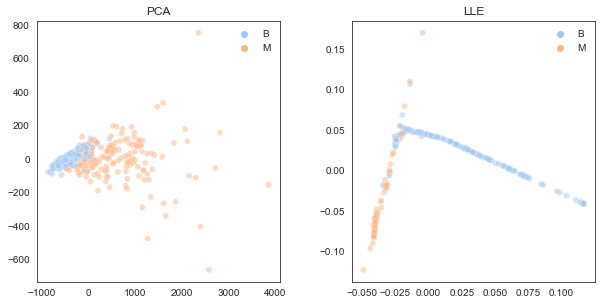

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_palette('pastel', 2)
fig = plt.figure(figsize=(10, 4.8))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0.3)
(ax1, ax2) = gs.subplots()

sns.scatterplot(x=X_train_pca.T[0], y=X_train_pca.T[1], hue=y_train, alpha=0.5, ax=ax1)
ax1.set_title('PCA')
ax1.legend(frameon=False)

sns.scatterplot(x=X_train_lle.T[0], y=X_train_lle.T[1], hue=y_train, alpha=0.5, ax=ax2)
ax2.set_title('LLE')
ax2.legend(frameon=False)

plt.savefig('figures/llc_vs_pca.png', dpi=250)
plt.show()